# El tratamiento de las variables categoricas

In [4]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [5]:
df = pd.read_csv("../datasets/ecom-expense/Ecom Expense.csv")

In [7]:
df.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485


In [8]:
dummy_gender = pd.get_dummies(df["Gender"],prefix = "Gender")
dummy_city_tier = pd.get_dummies(df["City Tier"],prefix = "City")

In [9]:
dummy_gender

,Gender_Female,Gender_Male
0,1,0
1,1,0
2,0,1
3,1,0
4,1,0
...,...,...
2357,0,1
2358,0,1
2359,1,0
2360,1,0


In [10]:
dummy_city_tier

,City_Tier 1,City_Tier 2,City_Tier 3
0,1,0,0
1,0,1,0
2,0,1,0
3,1,0,0
4,0,1,0
...,...,...,...
2357,0,1,0
2358,0,1,0
2359,0,0,1
2360,1,0,0


In [12]:
colum_names = df.columns.values
colum_names

array(['Transaction ID', 'Age ', ' Items ', 'Monthly Income',
       'Transaction Time', 'Record', 'Gender', 'City Tier', 'Total Spend'],
      dtype=object)

In [17]:
df_new = df[colum_names].join(dummy_gender)
colum_names = df_new.columns.values.tolist()
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0


In [18]:
df_new = df_new[colum_names].join(dummy_city_tier)

In [19]:
 df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0


In [49]:
feature_cols = ["Monthly Income","Record","Transaction Time","Gender_Female","Gender_Male","City_Tier 1","City_Tier 2","City_Tier 3"]

In [50]:
X = df_new[feature_cols]
Y = df_new["Total Spend"]

In [51]:
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [52]:
print(lm.intercept_)
print(lm.coef_)

-79.41713030134179
[ 1.47538980e-01  7.72233446e+02  1.54946125e-01 -1.31025013e+02
  1.31025013e+02  7.67643260e+01  5.51389743e+01 -1.31903300e+02]


In [53]:
list(zip(feature_cols, lm.coef_))

[('Monthly Income', 0.14753898049205771),
 ('Record', 772.2334457445644),
 ('Transaction Time', 0.15494612549582598),
 ('Gender_Female', -131.02501325554655),
 ('Gender_Male', 131.02501325554636),
 ('City_Tier 1', 76.76432601049532),
 ('City_Tier 2', 55.13897430923243),
 ('City_Tier 3', -131.90330031972778)]

In [54]:
lm.score(X,Y)

0.9179923586131016

# El modelo puede ser escrito como:
* Total_Spend = -79.41713030134179 + 'Montly Income' *0.14753898049205771 + 'Transaction Time'*0.15494612549582598 + 'Gender_Female'*-131.02501325554655 +'Gender_Male'*131.02501325554636 + 'City_Tier 1'*76.76432601049532 + 'City_Tier 2'*55.13897430923243 + 'City_Tier 3'*-131.90330031972778 + 'Record' * 772.2334457445644

    * Si es hombre y vive en City Tier 1: -79.41713030134179 + 'Montly Income' *0.14753898049205771 + 'Transaction Time'*0.15494612549582598 +'Gender_Male'*131.02501325554636 + 'City_Tier 1'*76.76432601049532 +'Record' * 772.2334457445644
    * Si es hombre y vive en City Tier 2: -79.41713030134179 + 'Montly Income' *0.14753898049205771 + 'Transaction Time'*0.15494612549582598 +'Gender_Male'*131.02501325554636 + 'City_Tier 2'*55.13897430923243 +'Record' * 772.2334457445644
    * Si es hombre y vive en City Tier 3: -79.41713030134179 + 'Montly Income' *0.14753898049205771 + 'Transaction Time'*0.15494612549582598 +'Gender_Male'*131.02501325554636 + 'City_Tier 3'*-131.90330031972778 +'Record' * 772.2334457445644

In [62]:
df_new["prediccion"] = -79.41713030134179 + df_new["Monthly Income"] * 0.14753898049205771 + df_new['Transaction Time']*0.15494612549582598 + df_new['Gender_Female']*-131.02501325554655 +df_new['Gender_Male']*131.02501325554636 + df_new['City_Tier 1']*76.76432601049532 + df_new['City_Tier 2']*55.13897430923243 + df_new['City_Tier 3']*-131.90330031972778+df_new["Record"]*772.2334457445644

In [63]:
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3,prediccion
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0,4903.696720
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0,4799.434826
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0,5157.082504
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0,8068.012996
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0,3581.980335


In [72]:
SSD = np.sum((df_new["prediccion"] - df_new["Total Spend"])**2)

In [73]:
SSD

1517733985.3408163

In [74]:
RSE = np.sqrt(SSD / (len(df_new)-len(feature_cols)-1))

In [75]:
RSE

803.1318809818165

In [76]:
sales_mean = np.mean(df_new["Total Spend"])

In [77]:
sales_mean

6163.176415976715

In [78]:
error = RSE / sales_mean

In [79]:
error * 100

13.03113568029416

In [80]:
df_new["automatic_predic"] = lm.predict(pd.DataFrame(df_new[feature_cols]))

In [82]:
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Female,Gender_Male,City_Tier 1,City_Tier 2,City_Tier 3,prediccion,automatic_predic
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,1,0,1,0,0,4903.696720,4903.696720
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,1,0,0,1,0,4799.434826,4799.434826
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,0,1,0,1,0,5157.082504,5157.082504
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,1,0,1,0,0,8068.012996,8068.012996
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,1,0,0,1,0,3581.980335,3581.980335


## Eliminar variables dummy redundantes

In [83]:
dummy_gender =pd.get_dummies(df["Gender"],prefix="Gender").iloc[:,1:]
dummy_gender.head()

,Gender_Male
0,0
1,0
2,1
3,0
4,0


In [84]:
dummy_city_tier = pd.get_dummies(df["City Tier"],prefix="city").iloc[:,1:]
dummy_city_tier.head()

,city_Tier 2,city_Tier 3
0,0,0
1,1,0
2,1,0
3,0,0
4,1,0


In [89]:
colum_names = df.columns.values.tolist()
df_new = df[colum_names].join(dummy_gender)
colum_names = df_new.columns.values.tolist()
df_new = df_new[colum_names].join(dummy_city_tier)
df_new.head()

,Transaction ID,Age,Items,Monthly Income,Transaction Time,Record,Gender,City Tier,Total Spend,Gender_Male,city_Tier 2,city_Tier 3
0,TXN001,42,10,7313,627.668127,5,Female,Tier 1,4198.385084,0,0,0
1,TXN002,24,8,17747,126.904567,3,Female,Tier 2,4134.976648,0,1,0
2,TXN003,47,11,22845,873.469701,2,Male,Tier 2,5166.614455,1,1,0
3,TXN004,50,11,18552,380.219428,7,Female,Tier 1,7784.447676,0,0,0
4,TXN005,60,2,14439,403.374223,2,Female,Tier 2,3254.160485,0,1,0


In [90]:
feature_cols = ["Monthly Income","Transaction Time","Gender_Male","city_Tier 2","city_Tier 3","Record"]
X = df_new[feature_cols]
Y = df_new["Total Spend"]
lm = LinearRegression()
lm.fit(X,Y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [91]:
print(lm.intercept_)

-133.67781754642238


In [92]:
list(zip(feature_cols,lm.coef_))

[('Monthly Income', 0.1475389804920575),
 ('Transaction Time', 0.15494612549589704),
 ('Gender_Male', 262.05002651109425),
 ('city_Tier 2', -21.625351701262773),
 ('city_Tier 3', -208.66762633022327),
 ('Record', 772.2334457445636)]

In [93]:
lm.score(X,Y)

0.9179923586131016

Coeficientes con todas las variables en el modelo
[('Monthly Income', 0.14753898049205771),
 ('Record', 772.2334457445644),
 ('Transaction Time', 0.15494612549582598),
 ('Gender_Female', -131.02501325554655),
 ('Gender_Male', 131.02501325554636),
 ('City_Tier 1', 76.76432601049532),
 ('City_Tier 2', 55.13897430923243),
 ('City_Tier 3', -131.90330031972778)]
 
 Coeficientes tras enmascarar las variables dummy pertinentes

[('Monthly Income', 0.1475389804920575),
 ('Transaction Time', 0.15494612549589704),
 ('Gender_Male', 262.05002651109425),
 ('city_Tier 2', -21.625351701262773),
 ('city_Tier 3', -208.66762633022327),
 ('Record', 772.2334457445636)]
 
 Los cambios se reflejan en 
 * Gender Male: 
     * antes --> 131.02, despues 262.05 = (131.02 -(-131.02))
 * Gender FEmale: 
     * antes --> -131.02, despues -> 0
 * CT1 
     * antes -> 76.76, despues -> 0
 * CT2 
     * antes -> 55.13, despues -> -21.65 = (55.13 - 76.76)
 * CT3 
     * antes -> -131.90, despues -> -208.66 = (-131.90, -76.76)
 
 

## Transformacion de variables para conseguir una relacion no lineal

In [94]:
data_auto = pd.read_csv("../datasets/auto/auto-mpg.csv")
data_auto.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,1,ford torino


In [95]:
data_auto.shape

(406, 9)

In [96]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'CF vs MPG')

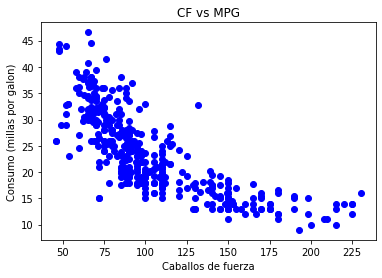

In [97]:
%matplotlib inline
data_auto["mpg"] = data_auto["mpg"].dropna()
data_auto["horsepower"] = data_auto["horsepower"].dropna()
plt.plot(data_auto["horsepower"], data_auto["mpg"], "bo")
plt.xlabel("Caballos de fuerza")
plt.ylabel("Consumo (millas por galon)")
plt.title("CF vs MPG")

## Modelo de regresion lineal
* mpg = a + b * horsepower

In [106]:
X = data_auto["horsepower"].fillna(data_auto["horsepower"].mean())
Y = data_auto["mpg"].fillna(data_auto["mpg"].mean())
X_data = X[:,np.newaxis]

In [101]:
lm = LinearRegression()
lm.fit(X_data,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [102]:
type(X)

pandas.core.series.Series

In [103]:
type(X_data)

numpy.ndarray

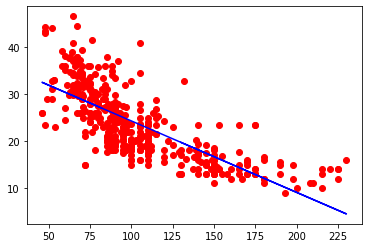

In [107]:
%matplotlib inline
plt.plot(X,Y,"ro")
plt.plot(X,lm.predict(X_data), color="blue")

In [108]:
lm.score(X_data,Y)

0.5746533406450252

In [112]:
SSD = np.sum((Y-lm.predict(X_data))**2)
RSE = np.sqrt(SSD/(len(X_data)-1))
y_mean = np.mean(Y)
error = RSE/y_mean

SSD, RSE, y_mean, error

(10315.751960060918,
 5.046879480825511,
 23.514572864321607,
 0.21462773361633472)

## Modelo de regresion cuadratico
* mpg = a + b * horsepower^2

In [113]:
X_data = X**2
X_data = X_data[:,np.newaxis]

In [114]:
lm = LinearRegression()
lm.fit(X_data,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [116]:
lm.score(X_data,Y)

0.4849887034823205

In [117]:
SSD = np.sum((Y-lm.predict(X_data))**2)
RSE = np.sqrt(SSD/(len(X_data)-1))
y_mean = np.mean(Y)
error = RSE/y_mean

SSD, RSE, y_mean, error

(12490.350340501926,
 5.553410772769817,
 23.514572864321607,
 0.23616889852998113)

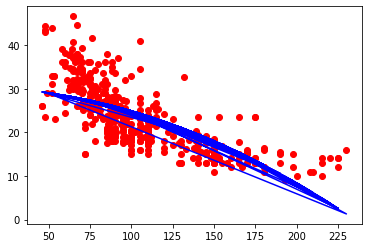

In [118]:
%matplotlib inline
plt.plot(X,Y,"ro")
plt.plot(X,lm.predict(X_data), color="blue")

## Modelo de regresion lineal y cuadratico 
* mpg = a + b horsepower + c horsepower^2

In [120]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

In [121]:
poly =PolynomialFeatures(degree=2)

In [122]:
X_data = poly.fit_transform(X[:,np.newaxis])

In [124]:
lm = linear_model.LinearRegression()
lm.fit(X_data,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [125]:
lm.score(X_data,Y)

0.6439066584257469

In [126]:
lm.intercept_

55.026192447081144

In [127]:
lm.coef_

array([ 0.        , -0.43404318,  0.00112615])

mpg = 55.026 -0.43404318 hp* +0.00112615*hp^2

In [146]:
for d in range(2,7):
    poly = PolynomialFeatures(degree=d)
    X_data = poly.fit_transform(X[:,np.newaxis])
    lm.fit(X_data,Y)
    print("Regresion de grado "+str(d))
    print(lm.score(X_data,Y))
    print(lm.intercept_)
    print(lm.coef_)
    regresion_validation(X_data,Y,lm.predict(X_data))
    print()

Regresion de grado 2
0.6439066584257469
55.026192447081144
[ 0.         -0.43404318  0.00112615]
SSD: 8636.180643524502 ,RSE: 4.61778115803654  ,Y_mean: 23.514572864321607 ,Error:19.6379546619069

Regresion de grado 3
0.6444678885560744
58.44877411167191
[ 0.00000000e+00 -5.27113167e-01  1.89736722e-03 -1.95723195e-06]
SSD: 8622.56936742855 ,RSE: 4.614140736300908  ,Y_mean: 23.514572864321607 ,Error:19.622473106036686

Regresion de grado 4
0.64676741897045
40.09664384899405
[ 0.00000000e+00  1.62563541e-01 -7.10892744e-03  4.65580255e-05
 -9.15840092e-08]
SSD: 8566.799832491357 ,RSE: 4.599194731579758  ,Y_mean: 23.514572864321607 ,Error:19.558912501268793

Regresion de grado 5
0.654751249183398
-40.69399227985734
[ 0.00000000e+00  4.00021889e+00 -7.54802461e-02  6.19621636e-04
 -2.36220983e-06  3.41983064e-09]
SSD: 8373.171387653196 ,RSE: 4.546921733817801  ,Y_mean: 23.514572864321607 ,Error:19.336612066285046

Regresion de grado 6
0.657285814200324
-156.9846886088098
[ 0.00000000e+00 

In [144]:
def regresion_validation(X_data, Y, Y_pred):
    SSD = np.sum((Y - Y_pred)**2)
    RSE = np.sqrt(SSD/(len(X_data)-1))
    y_mean = np.mean(Y)
    error = RSE/y_mean
    print("SSD: "+str(SSD),",RSE: "+str(RSE)," ,Y_mean: "+str(y_mean),",Error:"+str(error*100))

## El problema de los outliers

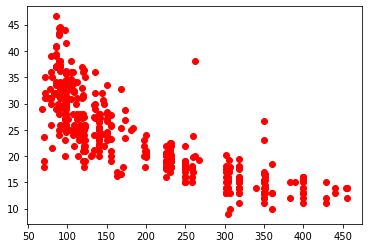

In [147]:
plt.plot(data_auto["displacement"],data_auto["mpg"],"ro")

In [150]:
X = data_auto["displacement"].fillna(data_auto["displacement"].mean())
X=X[:,np.newaxis]
Y = data_auto["mpg"].fillna(data_auto["mpg"].mean())
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [151]:
lm.score

<bound method RegressorMixin.score of LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)>

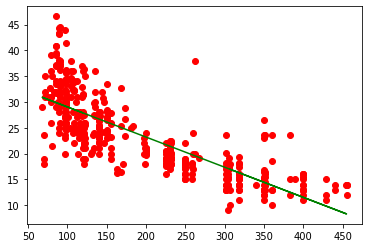

In [152]:
%matplotlib inline
plt.plot(X,Y,'ro')
plt.plot(X,lm.predict(X),color="green")

In [154]:
data_auto[(data_auto["displacement"]>250) & (data_auto["mpg"] > 35)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
395,38.0,6,262.0,85.0,3015,17.0,82,1,oldsmobile cutlass ciera (diesel)


In [155]:
data_auto[(data_auto["displacement"]>250) & (data_auto["mpg"] > 20)]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
258,20.2,8,302.0,139.0,3570,12.8,78,1,mercury monarch ghia
305,23.0,8,350.0,125.0,3900,17.4,79,1,cadillac eldorado
307,23.9,8,260.0,90.0,3420,22.2,79,1,oldsmobile cutlass salon brougham
372,26.6,8,350.0,105.0,3725,19.0,81,1,oldsmobile cutlass ls
395,38.0,6,262.0,85.0,3015,17.0,82,1,oldsmobile cutlass ciera (diesel)


In [156]:
data_auto_clean = data_auto.drop([395,372,307,258])

In [158]:
X = data_auto_clean["displacement"].fillna(data_auto_clean["displacement"].mean())
X=X[:,np.newaxis]
Y = data_auto_clean["mpg"].fillna(data_auto_clean["mpg"].mean())
lm = LinearRegression()
lm.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

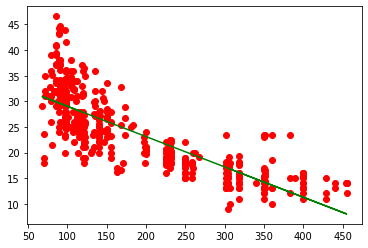

In [159]:
%matplotlib inline
plt.plot(X,Y,'ro')
plt.plot(X,lm.predict(X),color="green")